# Anime Rating - Multi-Linear Regression Case Study

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv(r"G:\Data Science Eduminds\Assignments\Machine Learning\Linear Regression\Anime Rating Case Study\anime_ratings_data.csv")
df.head(3)

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,NaN,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6523 non-null   object 
 1   mediaType       6496 non-null   object 
 2   eps             6523 non-null   int64  
 3   duration        6248 non-null   float64
 4   startYr         6523 non-null   int64  
 5   finishYr        6523 non-null   int64  
 6   description     4114 non-null   object 
 7   contentWarn     6523 non-null   object 
 8   watched         6523 non-null   int64  
 9   watching        6523 non-null   int64  
 10  rating          6523 non-null   float64
 11  votes           6496 non-null   float64
 12  studio_primary  6523 non-null   object 
 13  studios_colab   6523 non-null   object 
 14  genre           6523 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 764.5+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

In [7]:
df.drop(['title','description'], inplace=True, axis = 1)

In [9]:
df.head(3)

,mediaType,eps,duration,startYr,finishYr,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Movie,1,67.0,2015,2015,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Movie,1,5.0,2008,2008,No,10,0,2.120,10.0,Others,No,Other
2,TV Special,1,46.0,2014,2014,No,1630,16,3.758,1103.0,Others,No,Other


In [10]:
mT = df['mediaType'].value_counts()
mT

mediaType
TV             2145
Movie          1085
OVA             933
Music Video     674
Web             590
DVD Special     457
Other           320
TV Special      292
Name: count, dtype: int64

In [11]:
# MediaType has misssing values so we are filling them with either with mode or 'other'
df['mediaType'] = df['mediaType'].fillna(mT.index[0])

In [12]:
# votes has misssing values so we are filling them with its mean()
df['votes'] = df['votes'].fillna(df['votes'].mean())

In [13]:
df.isnull().sum()

mediaType           0
eps                 0
duration          275
startYr             0
finishYr            0
contentWarn         0
watched             0
watching            0
rating              0
votes               0
studio_primary      0
studios_colab       0
genre               0
dtype: int64

In [14]:
# df['duration'] = df.groupby(by=['mediaType'])['duration'].mean()
# df.to_csv(r'G:\Data Science Eduminds\Assignments\Machine Learning\Linear Regression\USA_Housing_Modified.csv')
# df['duration'] = df.groupby(by=['mediaType'])['duration'].apply(lambda x:x.fillna(x.mean()))  

# -------------------------------------> Above code doesn't work <-------------------------------------


# The issue is because groupby is returning a dataframe that isn't the same dimensions as the source dataframe.

# Try this:

duration_mean_df = df.groupby(by=['mediaType'])['duration'].transform('mean')

# Take a look at the gDF and look at the dimensions it should be what you want.
# Now if you want to write that mean value to all of the rows that have the same values in mediaType column
# then 
# even more columns in groupby (combination) you will have to do a merge as below.
#df['duration'] = df['duration'].fillna(df.merge(temp_df, how="left", on="mediaType"))

#pd.merge(left, right, how='inner', on=None)

df['duration'] = df['duration'].fillna(duration_mean_df)


In [15]:
df.isnull().sum()

mediaType         0
eps               0
duration          0
startYr           0
finishYr          0
contentWarn       0
watched           0
watching          0
rating            0
votes             0
studio_primary    0
studios_colab     0
genre             0
dtype: int64

In [16]:
df.head(3)

,mediaType,eps,duration,startYr,finishYr,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Movie,1,67.0,2015,2015,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Movie,1,5.0,2008,2008,No,10,0,2.120,10.0,Others,No,Other
2,TV Special,1,46.0,2014,2014,No,1630,16,3.758,1103.0,Others,No,Other


In [17]:
# So now, we have few columns which have categorical data that needs to be encoded into numerical data.

# 1. mediaType, studio_primary, studios_colab, and genre has several unique values with no inherant order (Nominal Data).
#    So we can use one-hot encoading encoding.

# 2. contentWarn has only two unique values yes and no (binary values) so we can use label encoding - most common approach


## Step 1: Apply One-Hot encoading to mediaType, studio_primary, studios_colab, and genre:

In [18]:

df = pd.get_dummies(df, columns=['mediaType', 'studio_primary', 'studios_colab', 'genre'], prefix=['media', 'studio', 'colab', 'genre'], drop_first=True)


## Step 2: Apply Binary encoading to contentWarn:

In [20]:
df['contentWarn'] = df['contentWarn'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

In [21]:
df.shape

(6523, 35)

## Step 3. Ensure that multicollinearity is addressed.

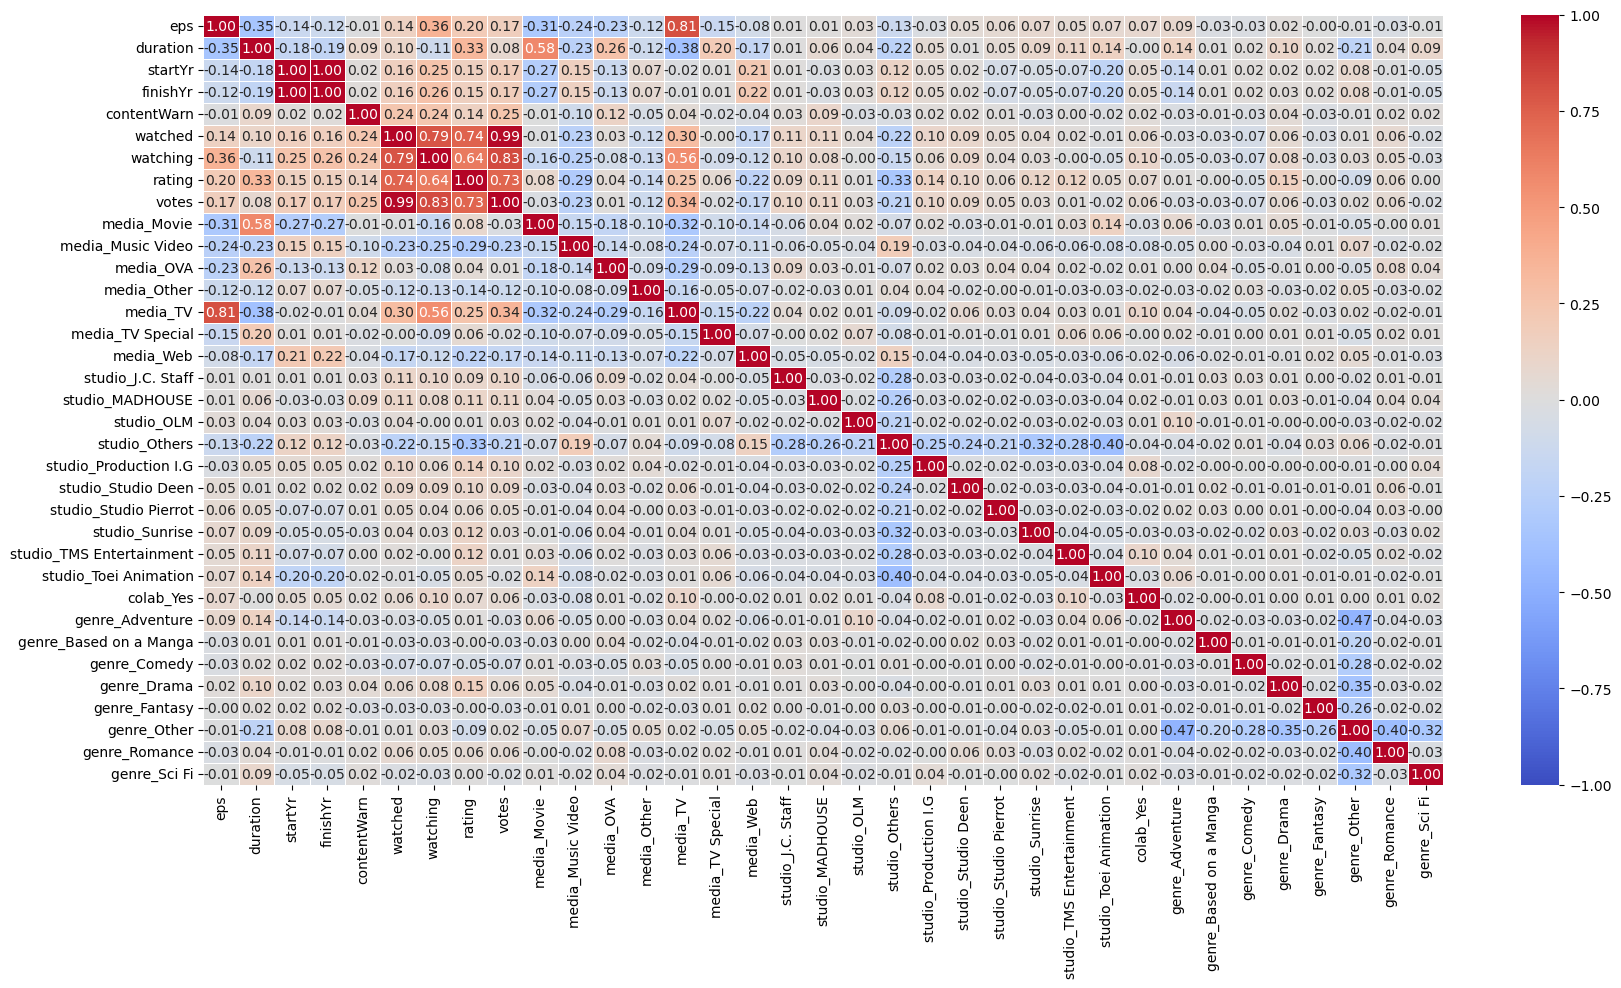

In [25]:
corr_matrix = df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt='.2f', mask=None)
plt.show()

In [27]:
# Cannot understand the above heatmap sowe need to Mask the upper triangle 

In [28]:
# Since the correlation matrix is symmetric, you can mask the upper triangle (or lower triangle) to avoid redundancy. 
# This makes the heatmap cleaner and focuses only on the unique pairs.

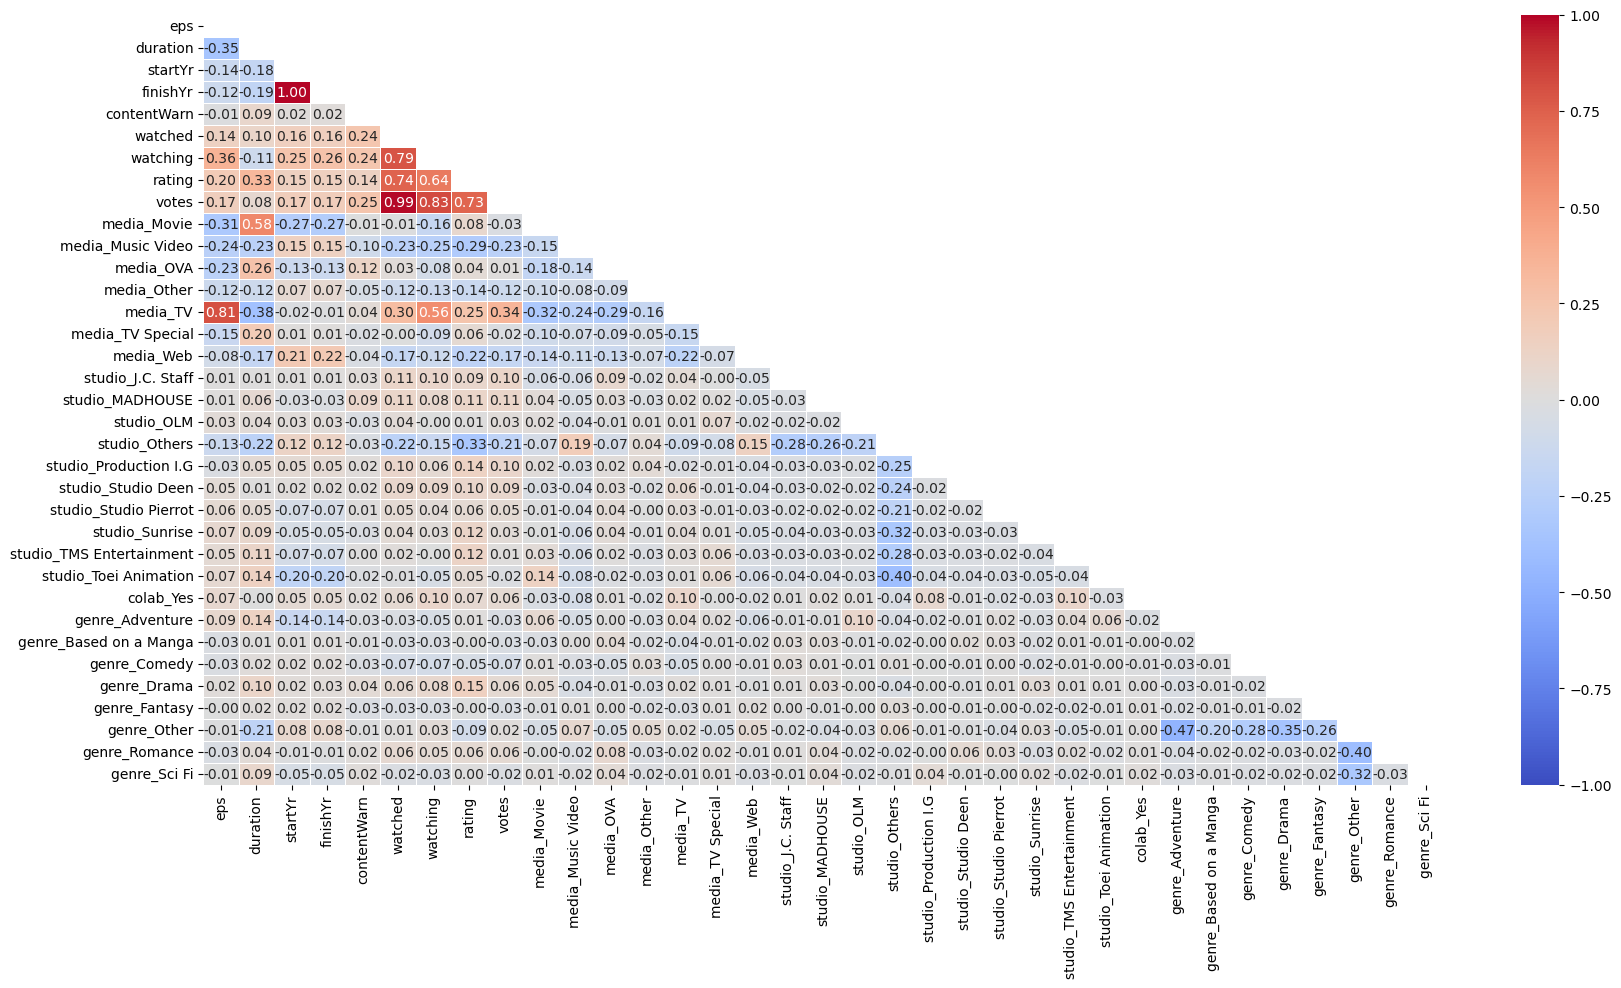

In [29]:
mask = np.triu(np.ones(corr_matrix.shape)) 

plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt='.2f', mask=mask)
plt.show()

In [30]:
# Analysis - A correlation of exactly 1 means that one feature is a perfect linear function of the other. 
# In this case, one of these features should definitely be removed because they carry exactly the same information.
# Or Feature Engineering can be done - Instead of removing features, consider combining them if they represent similar concepts.

In [31]:
df['time_span'] = df['finishYr'] - df['startYr']
df.drop(['startYr', 'finishYr'], axis = 1, inplace = True)
df.head(3)

,eps,duration,contentWarn,watched,watching,rating,votes,media_Movie,media_Music Video,media_OVA,media_Other,media_TV,media_TV Special,media_Web,studio_J.C. Staff,studio_MADHOUSE,studio_OLM,studio_Others,studio_Production I.G,studio_Studio Deen,studio_Studio Pierrot,studio_Sunrise,studio_TMS Entertainment,studio_Toei Animation,colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi,time_span
0,1,67.0,0,4649,86,3.979,3100.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,0
1,1,5.0,0,10,0,2.120,10.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0
2,1,46.0,0,1630,16,3.758,1103.0,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0


In [32]:
# Now back to step 3 to check multicollinearity.

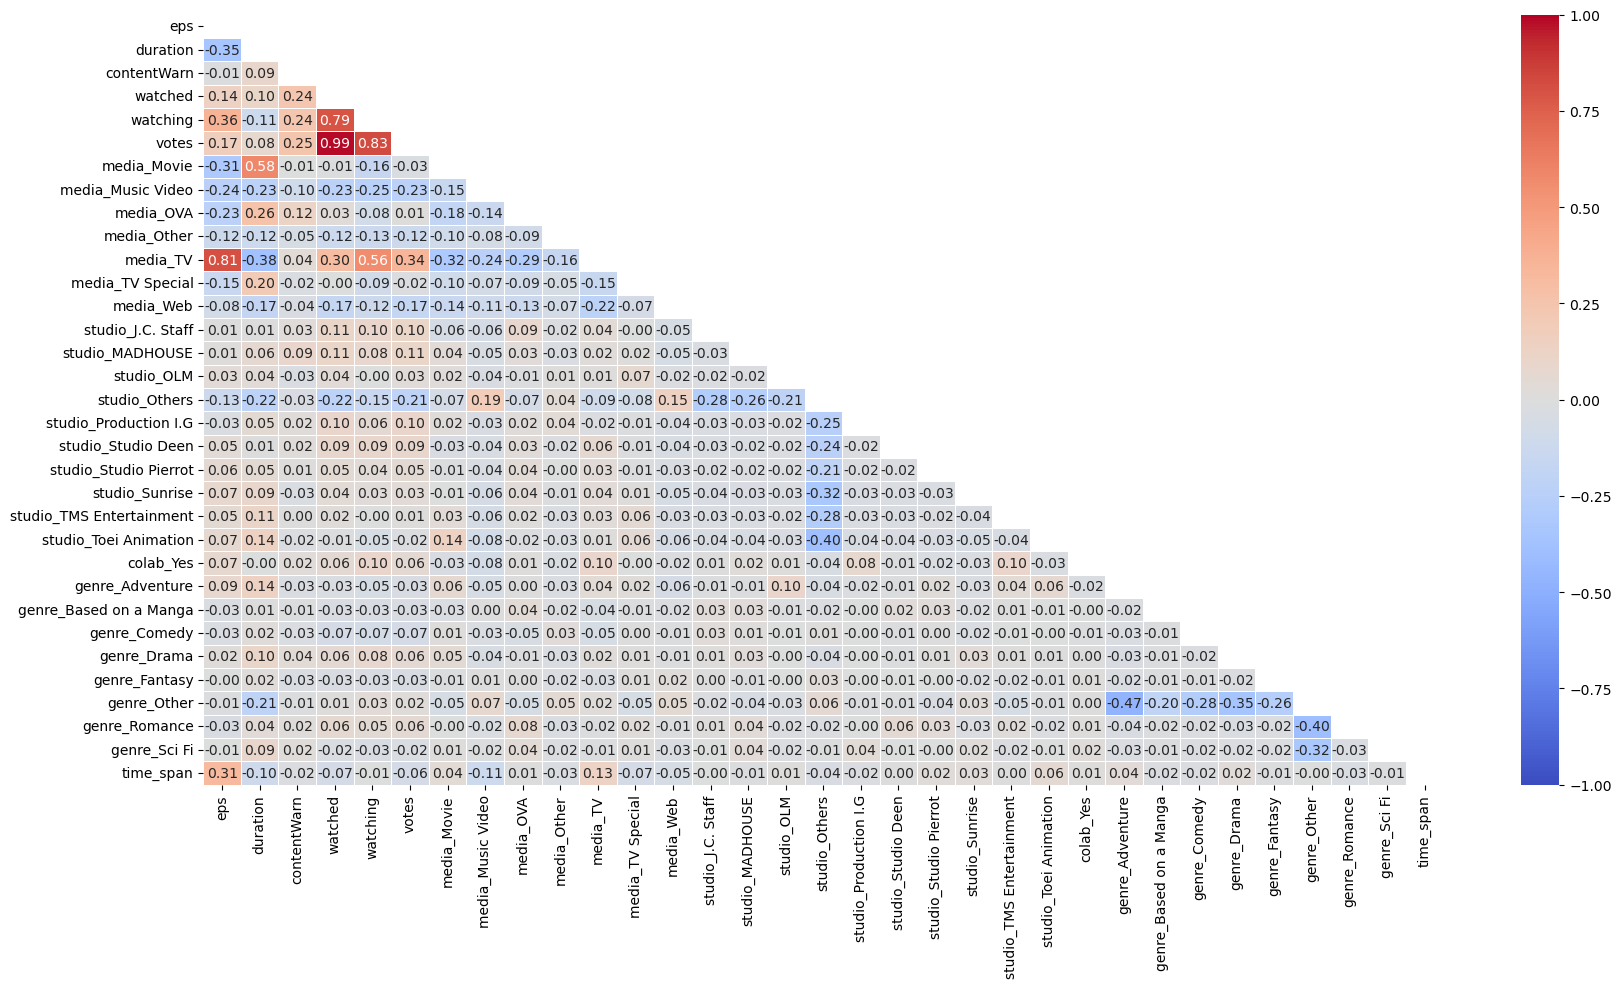

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

corr_matrix = df.drop(columns=['rating']).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) 

plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt='.2f', mask=mask)
plt.show()

In [34]:
# Now we have only 6 values with correlations ranging from 0.56 to 0.99.
# This means we have identified some strong correlations between the independent variables.
# So, we further need to proceed with Variance Inflation Factor (VIF) to Check Multicollinearity.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   eps                       6523 non-null   int64  
 1   duration                  6523 non-null   float64
 2   contentWarn               6523 non-null   int64  
 3   watched                   6523 non-null   int64  
 4   watching                  6523 non-null   int64  
 5   rating                    6523 non-null   float64
 6   votes                     6523 non-null   float64
 7   media_Movie               6523 non-null   bool   
 8   media_Music Video         6523 non-null   bool   
 9   media_OVA                 6523 non-null   bool   
 10  media_Other               6523 non-null   bool   
 11  media_TV                  6523 non-null   bool   
 12  media_TV Special          6523 non-null   bool   
 13  media_Web                 6523 non-null   bool   
 14  studio_J

In [63]:
# To double-check the features are not suffering from multicollinearity, calculate the VIF:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# We have bool columns so we need to convert them to numeric (0 & 1) as VIF cannot understand bool. 

# Use applymap() when you want to transform every element in the DataFrame (in this case, converting booleans to 1s and 0s).
# Use apply() when you want to apply a function to each column or row in the DataFrame.
# Use map() to apply the transformation only to boolean columns.

# using applymap() the code will be:
# X = X.applymap(lambda x: 1 if x == True else (0 if x == False else x))

# But applumap() is deprecated so better use apply() and map()

# using apply() and map() in combination the code will be:
# X = X.apply(lambda x: x.map({True: 1, False: 0}) if x.dtype == 'bool' else x)

# Select bool, float64, int32, int64 columns for VIF calculation
X = df.drop(columns=['rating']).select_dtypes(include=['float64', 'int32', 'int64', 'bool'])

X = X.apply(lambda x: x.map({True: 1, False: 0}) if x.dtype == 'bool' else x) # Convert bool value to 0 & 1.

def cal_vif(X):
    # Calculate VIF for each feature
    X = add_constant(X)  # Adds a constant term to the model (intercept)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_data.drop([0], inplace=True)
    return vif_data

vif_data = cal_vif(X)
print(vif_data)


                     Feature        VIF
1                        eps   3.808116
2                   duration   2.760506
3                contentWarn   1.113182
4                    watched  65.446278
5                   watching   4.972726
6                      votes  76.233783
7                media_Movie   4.083361
8          media_Music Video   2.385826
9                  media_OVA   3.056468
10               media_Other   1.664069
11                  media_TV   6.943327
12          media_TV Special   1.799573
13                 media_Web   2.217523
14         studio_J.C. Staff   2.563141
15           studio_MADHOUSE   2.402888
16                studio_OLM   1.949020
17             studio_Others  11.581932
18     studio_Production I.G   2.292053
19        studio_Studio Deen   2.127223
20     studio_Studio Pierrot   1.926660
21            studio_Sunrise   3.071042
22  studio_TMS Entertainment   2.634917
23     studio_Toei Animation   4.061553
24                 colab_Yes   1.038805


In [64]:
def remove_high_vif(vif, X, threshold = 15):
    sorted_vif = vif.sort_values(by='VIF', ascending=False, ignore_index=True)
    while sorted_vif['VIF'][0]>threshold:
        X.drop([sorted_vif['Feature'][0]], axis=1, inplace=True)
        vif_data = cal_vif(X)
        sorted_vif = vif_data.sort_values(by='VIF', ascending=False, ignore_index=True)
    
    return X, vif_data
X, vif_data = remove_high_vif(vif_data, X, threshold=20)

In [68]:
# # So we are simple excluding the watched, votes, studio_Others, and genre_Other features:

# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant

# X_VIF = df.drop(columns=['rating', 'watched', 'votes','studio_Others','genre_Other']).select_dtypes(include=['float64', 'int32', 'int64', 'bool'])
# X_VIF = X_VIF.apply(lambda x: x.map({True: 1, False: 0}) if x.dtype == 'bool' else x) # Convert bool value to 0 & 1.
# X_VIF = add_constant(X_VIF)  # Adds a constant term to the model (intercept)

# # Calculate VIF for each feature
# vif_data = pd.DataFrame()
# vif_data["Feature"] = X_VIF.columns
# vif_data["VIF"] = [variance_inflation_factor(X_VIF.values, i) for i in range(X.shape[1])]

# print(vif_data)

## Step 3: Multi-Linear Regression Model

### Step 3.1: Split the Data

In [69]:
# We already have X. get the target variable in y.
y = df['rating']

# Split the dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 3.2: Train the Model

In [70]:
# Model training using this updated X:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Step 3.3: Model Evaluation

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

R-squared: 0.7152811265242969
Mean Squared Error (MSE): 0.16955553201967033
Mean Absolute Error (MAE): 0.33644758611507797
Root Mean Squared Error (RMSE): 0.411771213199357


In [72]:
# pd.DataFrame({"Columns":X_train.columns,"Coefficients":model.coef_})

In [74]:
""" 
R-squared: 0.7196854204000713
Mean Squared Error (MSE): 0.1669326908213975
Mean Absolute Error (MAE): 0.33367270117707626
Root Mean Squared Error (RMSE): 0.1669326908213975

The MLR model we trained is giving 71.96% correct result which can be improved.

Steps we'll follow those were not taken intentionally:

1. Remove Outliers:
    - Use IQR (Interquartile Range) or Z-score to identify and remove outliers.
2. Feature Scaling (optional but recommended for Linear Regression):
    - Use StandardScaler (Standadization) or MinMaxScaler (Normalilzation) to normalize your features.

"""

" \nR-squared: 0.7196854204000713\nMean Squared Error (MSE): 0.1669326908213975\nMean Absolute Error (MAE): 0.33367270117707626\nRoot Mean Squared Error (RMSE): 0.1669326908213975\n\nThe MLR model we trained is giving 71.96% correct result which can be improved.\n\nSteps we'll follow those were not taken intentionally:\n\n1. Remove Outliers:\n    - Use IQR (Interquartile Range) or Z-score to identify and remove outliers.\n2. Feature Scaling (optional but recommended for Linear Regression):\n    - Use StandardScaler (Standadization) or MinMaxScaler (Normalilzation) to normalize your features.\n\n"

### 1. Remove Outliers:

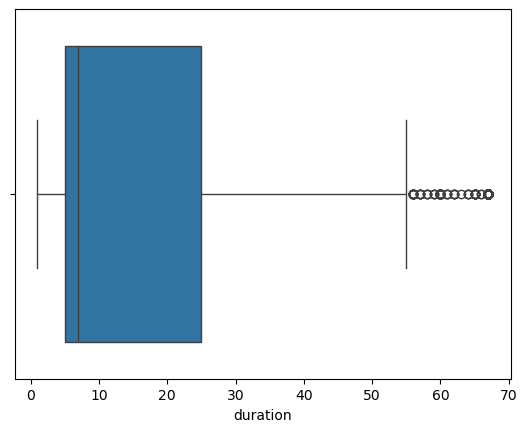

In [77]:
sns.boxplot(data=X_train, x='duration')
plt.show()  #  Remove for all columns whic have outliers

In [107]:
#### Step 1. Using IQR:

q1 = X_train.quantile(0.25)
q3 = X_train.quantile(0.75)
IQR = q3-q1
min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

X_train_no_outliers = X_train[~((X_train < min_range)|(X_train > max_range)).any(axis=1)]
y_train_no_outliers = y_train[X_train_no_outliers.index]

X_train.shape, X_train_no_outliers.shape

((5218, 34), (725, 34))

In [108]:
#### Step 2. Using Z-Score:

from scipy import stats
z_score = stats.zscore(X_train)

X_train_no_outliers = X_train[(np.abs(z_score)<3).all(axis=1)]
y_train_no_outliers = y_train[X_train_no_outliers.index]

X_train.shape, X_train_no_outliers.shape

# No need to remove the outliers from testing data.

((5218, 34), (2372, 34))

### 2. Feature Scaling

In [110]:
# So, we are proceeding with Standardization:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform on training data, and transform the test data:
X_train_no_outliers_scaled = scaler.fit_transform(X_train_no_outliers)
''' ---------- Don't fit on test data, only transform ---------- '''
X_test_scaled = scaler.transform(X_test)

# Fit and transform on training data, and transform the test data:
# y_train_no_outliers_scaled = scaler.fit_transform(y_train_no_outliers.values.reshape(-1, 1))
y_train_no_outliers_scaled = y_train_no_outliers
''' ---------- Don't fit on test data, only transform ---------- '''
# y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))
y_test_scaled = y_test

### Model Training:

In [111]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_no_outliers_scaled, y_train_no_outliers_scaled)  # Using the cleaned and scaled data

LinearRegression()

### Model Evaluation:

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = lr_model.predict(X_test_scaled)

print(f"R-squared: {r2_score(y_test_scaled, y_pred)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_scaled, y_pred)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test_scaled, y_pred)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test_scaled, y_pred))}")

R-squared: 0.6504242014247952
Mean Squared Error (MSE): 0.20817907076215683
Mean Absolute Error (MAE): 0.3724344422557945
Root Mean Squared Error (RMSE): 0.45626644711413616


In [113]:

# Add a constant (intercept) to the independent variables (X_train)
X_train_ols = sm.add_constant(X_train_no_outliers_scaled)  # Use scaled data if you have scaled it

# Fit the OLS model
# ols_model = sm.OLS(y_train_no_outliers_scaled, X_train_ols).fit()
ols_model = sm.OLS(endog=y_train_no_outliers_scaled, exog= X_train_ols, hasconst=True).fit()

# Get the summary of the model
print(ols_model.summary())

# Make predictions
y_pred = ols_model.predict(X_train_ols)

# Evaluate the model
print(f'R-squared: {r2_score(y_train_no_outliers_scaled, y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_train_no_outliers_scaled, y_pred)}')


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     423.0
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:16:50   Log-Likelihood:                -1212.2
No. Observations:                2372   AIC:                             2452.
Df Residuals:                    2358   BIC:                             2533.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9315      0.008    352.911      0.0

In [ ]:
'''
Still R-squared is 69.98% so we can follow feature engineering:
    - For feature 'watching' and 'watched' we can crate a new feature such as user_base.
'''


In [115]:
user_base = (df['watched'] + df['watching'])/2
df['user_base'] = user_base
df_for_OLS = df.drop(columns=['watching', 'watched'])
df_for_OLS.head(3)

,eps,duration,contentWarn,rating,votes,media_Movie,media_Music Video,media_OVA,media_Other,media_TV,media_TV Special,media_Web,studio_J.C. Staff,studio_MADHOUSE,studio_OLM,studio_Others,studio_Production I.G,studio_Studio Deen,studio_Studio Pierrot,studio_Sunrise,studio_TMS Entertainment,studio_Toei Animation,colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi,time_span,user_base
0,1,67.0,0,3.979,3100.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,0,2367.5
1,1,5.0,0,2.120,10.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0,5.0
2,1,46.0,0,3.758,1103.0,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0,823.0


In [116]:
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split



X = df_for_OLS.drop(columns=['rating'])
X = X.apply(lambda x: x.map({True: 1, False: 0}) if x.dtype == 'bool' else x) # Convert bool value to 0 & 1.
X = add_constant(X)  # Adds a constant term to the model (intercept)
y = df_for_OLS['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant (intercept) to the independent variables (X_train)
X_train_ols = sm.add_constant(X_train)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Get the summary of the model
print(ols_model.summary())

# Make predictions
y_pred = ols_model.predict(X_train_ols)

# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error
print(f'R-squared: {r2_score(y_train, y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_train, y_pred)}')


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     365.3
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:17:32   Log-Likelihood:                -2875.9
No. Observations:                5218   AIC:                             5818.
Df Residuals:                    5185   BIC:                             6034.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
'''
After feature 'watching' and 'watched' are added to user_base we get decreased accuracy:
    R-squared: 0.6927409845113429
    Mean Squared Error: 0.17629535061230706
So, discard this technique.
'''

In [ ]:
'''
So, we can proceed further with Use Regularization.
Regularized models like Ridge Regression or Lasso Regression are more robust to correlated features.
These techniques will penalize large coefficients, helping to mitigate the impact of correlated features.
Ridge and Lasso Regression are two regularization techniques used to address multicollinearity and overfitting in linear models. 
They both add a penalty term to the linear regression equation to constrain the model, making it less likely to overfit.

1. Ridge Regression (L2 Regularization)
Ridge regression adds a penalty term proportional to the square of the coefficients (L2 penalty) to the linear regression cost function.
This penalty discourages large coefficient values, thus preventing the model from overfitting.

2. Lasso Regression (L1 Regularization)
Lasso regression is similar to Ridge but with an L1 penalty (absolute value of coefficients).
This causes some coefficients to be exactly zero, effectively selecting a subset of features. This leads to a sparse model.
'''

### 1. Ridge regression

In [117]:
# 1. Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = df.drop(columns=['rating']).select_dtypes(include=['float64', 'int32', 'int64', 'bool'])
X = X.apply(lambda x: x.map({True: 1, False: 0}) if x.dtype == 'bool' else x) # Convert bool value to 0 & 1.
y = df['rating']
# Split the data into training and testing sets (example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge regression model with alpha=1
ridge = Ridge(alpha=1)

# Fit the model
ridge.fit(X_train, y_train)

# Make predictions
y_pred = ridge.predict(X_test)

# Evaluate the model
print(f'R-squared: {ridge.score(X_test, y_test)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}')

R-squared: 0.7196149718528406
Mean Squared Error (MSE): 0.1669746442780121
Mean Absolute Error (MAE): 0.3338046004489009
Root Mean Squared Error (RMSE): 0.4086253103737115


In [118]:
'''
Ridge regression gave similar result (R-squared: 0.7196149717727736), so we try Hyperparameter Tuning:
    - The performance of Ridge regression depends on the choice of the regularization parameter alpha.
    - Using a GridSearchCV or RandomizedSearchCV to find the best alpha might help improve the model.
'''

'\nRidge regression gave similar result (R-squared: 0.7196149717727736), so we try Hyperparameter Tuning:\n    - The performance of Ridge regression depends on the choice of the regularization parameter alpha.\n    - Using a GridSearchCV or RandomizedSearchCV to find the best alpha might help improve the model.\n'

#### Hyperparameter Tuning for Ridge using GridSearchCV with neg_mean_squared_error:

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the model
ridge = Ridge()

# Define the hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

X = df.drop(columns=['rating']).select_dtypes(include=['float64', 'int32', 'int64', 'bool'])
X = X.apply(lambda x: x.map({True: 1, False: 0}) if x.dtype == 'bool' else x) # Convert bool value to 0 & 1.
y = df['rating']
# Split the data into training and testing sets (example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f'Best alpha: {grid_search.best_params_}')
ridge_best = grid_search.best_estimator_

# Evaluate the model
y_pred = ridge_best.predict(X_test)
print(f'R-squared: {ridge_best.score(X_test, y_test)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}')


Best alpha: {'alpha': 1}
R-squared: 0.7196149718528406
Mean Squared Error (MSE): 0.1669746442780121


In [120]:
'''
It seems that even after hyperparameter tuning with Ridge Regression, you are getting the same results.

Before Ridge:
    R-squared: 0.7196149717727736
    Mean Squared Error (MSE): 0.16697464432569356
    Mean Absolute Error (MAE): 0.33380460044449956
    Root Mean Squared Error (RMSE): 0.4086253104320553

After Ridge:
    Best alpha: {'alpha': 1}
    R-squared: 0.7196149717727736
    Mean Squared Error (MSE): 0.16697464432569356

Now, proceed with Lasso Regression.
'''

"\nIt seems that even after hyperparameter tuning with Ridge Regression, you are getting the same results.\n\nBefore Ridge:\n    R-squared: 0.7196149717727736\n    Mean Squared Error (MSE): 0.16697464432569356\n    Mean Absolute Error (MAE): 0.33380460044449956\n    Root Mean Squared Error (RMSE): 0.4086253104320553\n\nAfter Ridge:\n    Best alpha: {'alpha': 1}\n    R-squared: 0.7196149717727736\n    Mean Squared Error (MSE): 0.16697464432569356\n\nNow, proceed with Lasso Regression.\n"

### 2. Lasso Regression

In [121]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

X = df.drop(columns=['rating']).select_dtypes(include=['float64', 'int32', 'int64', 'bool'])
X = X.apply(lambda x: x.map({True: 1, False: 0}) if x.dtype == 'bool' else x) # Convert bool value to 0 & 1.
y = df['rating']
# Split the data into training and testing sets (example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print(f'R-squared: {r2_score(y_test, y_pred_lasso)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_lasso)}')


R-squared: 0.6750776596712882
Mean Squared Error (MSE): 0.19349746508537136


In [122]:
#### Hyperparameter Tuning for Lasso using GridSearchCV with neg_mean_squared_error:

In [123]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Setting up the grid search for Lasso
param_grid = {'alpha': [0.01, 0.1, 0.5, 1, 10]}
lasso = Lasso()

X = df.drop(columns=['rating']).select_dtypes(include=['float64', 'int32', 'int64', 'bool'])
X = X.apply(lambda x: x.map({True: 1, False: 0}) if x.dtype == 'bool' else x) # Convert bool value to 0 & 1.
y = df['rating']
# Split the data into training and testing sets (example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best alpha
print("Best alpha: ", grid_search.best_params_)

# Evaluate with the best alpha
best_lasso = grid_search.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)

print(f'R-squared: {r2_score(y_test, y_pred_lasso)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_lasso)}')


Best alpha:  {'alpha': 0.01}
R-squared: 0.689711942178366
Mean Squared Error (MSE): 0.18478247009426665


In [124]:
'''
Despite tuning Ridge and Lasso and trying different alpha values, the performance is still not good.
It's not surpassing the initial Ridge Regression model that had an R-squared of 71.96%.
so, now proceed with polynomial features with Ridge Regression model as it's accuracy is (71.96%).
'''

"\nDespite tuning Ridge and Lasso and trying different alpha values, the performance is still not good.\nIt's not surpassing the initial Ridge Regression model that had an R-squared of 71.96%.\nso, now proceed with polynomial features with Ridge Regression model as it's accuracy is (71.96%).\n"

In [125]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

X = df.drop(columns=['rating']).select_dtypes(include=['float64', 'int32', 'int64', 'bool'])
X = X.apply(lambda x: x.map({True: 1, False: 0}) if x.dtype == 'bool' else x) # Convert bool value to 0 & 1.
y = df['rating']
# Split the data into training and testing sets (example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create interaction-only polynomial features
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_train)

# Train a model using Ridge Regression
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_poly, y_train)

# Predict and evaluate the model
y_pred_ridge = ridge_model.predict(poly.transform(X_test))
print(f'R-squared (Ridge with interaction features): {r2_score(y_test, y_pred_ridge)}')


R-squared (Ridge with interaction features): 0.7671515198732517


C:\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.2094e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [126]:
'''
R-squared (Ridge with interaction features): 0.7579741094649897
Accuracy is bit increased but still not sufficient. 
So we try with higher degrees for polynomial features (e.g., degree=3, degree=4). 
Higher degree polynomial features can capture more complex relationships between the features and the target variable.
But be cautious about overfitting.
'''

'\nR-squared (Ridge with interaction features): 0.7579741094649897\nAccuracy is bit increased but still not sufficient. \nSo we try with higher degrees for polynomial features (e.g., degree=3, degree=4). \nHigher degree polynomial features can capture more complex relationships between the features and the target variable.\nBut be cautious about overfitting.\n'

## Random Forest Regression Model

In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV


X = df.drop(columns=['rating', 'watched', 'votes','studio_Others','genre_Other']).select_dtypes(include=['float64', 'int32', 'int64', 'bool'])
X = X.apply(lambda x: x.map({True: 1, False: 0}) if x.dtype == 'bool' else x) # Convert bool value to 0 & 1.
y = df['rating']

# Initialize RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and fit the model
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Evaluate the model
y_pred = best_rf.predict(X_test)

from sklearn.metrics import r2_score
print(f'R-squared: {r2_score(y_test, y_pred)}')


# This model takes lot of resources and time to execute and still gives R-squared: 0.7853870299001918
# Best suitable for large samples and high-end hardware (Time consuming)

R-squared: 0.7853870299001918


In [128]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

X = df.drop(columns=['rating']).select_dtypes(include=['float64', 'int32', 'int64', 'bool'])
X = X.apply(lambda x: x.map({True: 1, False: 0}) if x.dtype == 'bool' else x) # Convert bool value to 0 & 1.
y = df['rating']
# Split the data into training and testing sets (example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_ridge_model = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1))

poly_ridge_model.fit(X_train, y_train)

y_pred_poly = poly_ridge_model.predict(X_test)

from sklearn.metrics import r2_score
print(f'R-squared with Polynomial Features (degree=3): {r2_score(y_test, y_pred_poly)}')


R-squared with Polynomial Features (degree=3): 0.7672083899644483


In [129]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming df is already defined

# Select features and target variable
X = df.drop(columns=['rating']).select_dtypes(include=['float64', 'int32', 'int64', 'bool'])
X = X.apply(lambda x: x.map({True: 1, False: 0}) if x.dtype == 'bool' else x)  # Convert bool value to 0 & 1
y = df['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Using Pipeline for Polynomial Features + Ridge Regression
poly_ridge_model = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1))
poly_ridge_model.fit(X_train, y_train)
y_pred_poly = poly_ridge_model.predict(X_test)

# R-squared score from pipeline model
print(f'R-squared with Polynomial Features (degree=2) + Ridge Regression (from pipeline): {r2_score(y_test, y_pred_poly)}')

# Step 2: Manual Ridge Regression with Polynomial Features (without pipeline)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Apply Ridge Regression manually
ridge = Ridge(alpha=1)
ridge.fit(X_train_poly, y_train)

# Evaluate the model manually
y_pred_ridge = ridge.predict(X_test_poly)
print(f"R-squared (Ridge Regression manually): {r2_score(y_test, y_pred_ridge)}")


R-squared with Polynomial Features (degree=2) + Ridge Regression (from pipeline): 0.7672083899644483
R-squared (Ridge Regression manually): 0.7672083899644483
